<ipython-input-2-2936e575e173>:21: RuntimeWarning: covariance is not positive-semidefinite.
  data_2 = x2, y2 = np.random.multivariate_normal(mean2, cov2, 500).T
No handles with labels found to put in legend.


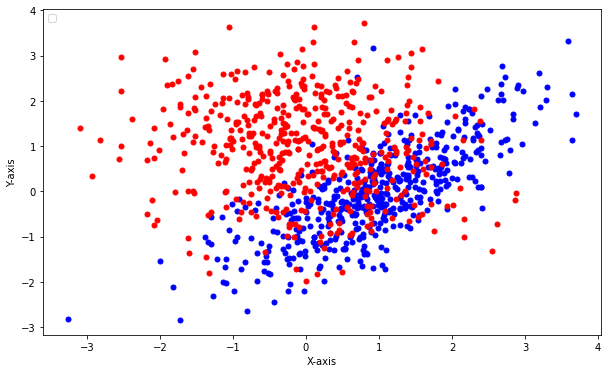

cross-entropy loss = 0.4789952475496294 learning-rate= 0.0001 Number of iterations= 10000
Train Accuracy: 0.844%
Test Accuracy: 0.812%
cross-entropy loss = 0.4345148982832974 learning-rate= 0.001 Number of iterations= 10000
Train Accuracy: 0.842%
Test Accuracy: 0.81%
the loss converges at iteration= 9510 with loss value= 0.43448251456236825 when learning rate= 0.01
Train Accuracy: 0.842%
Test Accuracy: 0.81%


No handles with labels found to put in legend.


the loss converges at iteration= 2144 with loss value= 0.43448251456228604 when learning rate= 0.1
Train Accuracy: 0.842%
Test Accuracy: 0.81%
the gradient vanishes at iteration= 223 with norm value= 9.707399665132113e-09 when learning rate= 1
Train Accuracy: 0.842%
Test Accuracy: 0.81%


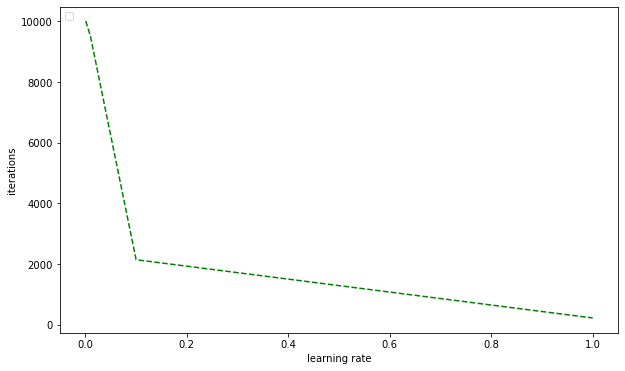

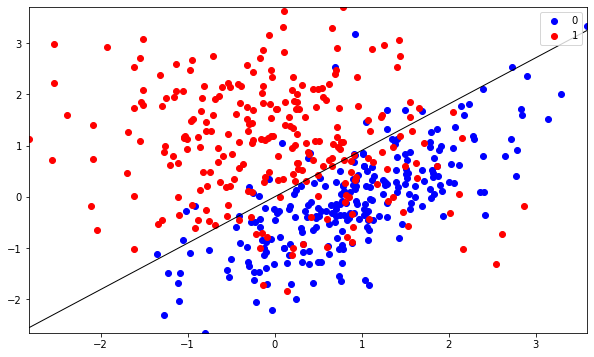

cross-entropy loss = 0.4345148982832974 learning-rate= 0.001 Number of iterations= 10000
0.5200748907842728


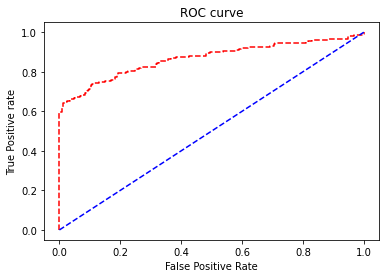

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

from sklearn.model_selection import train_test_split
import numpy as np
import random as random
import time

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# generating the data set
mean1 = [1, 0]
mean2 = [0, 1]
cov1 = [[1, 0.75], [0.75, 1]]
cov2 = [[1, -0.5], [0.5, 1]]
data_1 = x1, y1 = np.random.multivariate_normal(mean1, cov1, 500).T
data_2 = x2, y2 = np.random.multivariate_normal(mean2, cov2, 500).T
data_X = x, y = np.concatenate((data_1, data_2), axis=1)
df = pd.DataFrame(data_X, index=['x', 'y']).T
# df['Class_Label'] = [random.randint(0, 1) for k in df.index]
X_dataframe = df.to_numpy()
X = X_dataframe[:, :2]
y = np.hstack((np.zeros(500),np.ones(500)))







plt.figure(figsize=(10, 6))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(x1, y1, s=25, c='Blue')
plt.scatter(x2, y2, s=25, c='Red')
plt.legend(loc="upper left")
plt.show(-10, 10)



def __sigmoid(z):
        return 1 / (1 + np.exp(-z))
    
def __loss(h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
def fit(X, y,lr=0.01,num_iter=10000,epochs=5,batch_size=3):
        
        # weights initialization
        theta = np.zeros(X.shape[1])
        
        for epoch in range(epochs):
                loss = [0]*10001
                for i in range(0,num_iter):
                    z = np.dot(X, theta)
                    h = __sigmoid(z)
                    gradient = np.dot(X.T, (h - y)) / y.size
                    norms = np.linalg.norm(gradient,axis=0)
                    theta -= lr * gradient
                    z = np.dot(X, theta)
                    h = __sigmoid(z)
                    loss[i] = __loss(h, y)
                    if(loss[i-1] == loss[i]):
                        print("the loss converges at iteration=",i+1,"with loss value=",loss[i],"when learning rate=",lr)
                        
                        return(theta,i+1)
                    elif(norms<0.00000001):
                        print("the gradient vanishes at iteration=",i+1,"with norm value=",norms,"when learning rate=",lr)
                        
                        return(theta,i+1)

            
        print("cross-entropy loss =",loss[9999],"learning-rate=",lr,"Number of iterations=",i+1)
        
        
        return(theta,i+1)


def predict_prob(X,theta):
        
        return __sigmoid(np.dot(X, theta))
    
def predict(X,theta):
        return predict_prob(X,theta).round()
  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)


iterations=[0,0,0,0,0]
lr = [0.0001,.001,.01,.1,1]
for i in range(0,5):
    theta,iterations[i] = fit(X_train,y_train,lr[i],epochs=5,batch_size=3)    
    
    print("Train Accuracy: {}%".format(accuracy_score(y_train, predict(X_train,theta))))
    print("Test Accuracy: {}%".format(accuracy_score(y_test, predict(X_test,theta))))


    
plt.figure(figsize=(10, 6))
plt.xlabel('learning rate')
plt.ylabel('iterations')
plt.plot(lr, iterations, linestyle='--',color='green')
plt.legend(loc="upper left")
plt.show(-10, 10)
    

plt.show
    
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='b', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X_train[:,0].min(), X_train[:,0].max(),
x2_min, x2_max = X_train[:,1].min(), X_train[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = predict_prob(grid,theta).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
plt.show()
    

    

theta,i=fit(X_train,y_train,lr[1],epochs=5,batch_size=3)
pred_prob1 = predict_prob(X_test,theta)

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1, pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


auc_score1 = roc_auc_score(y_test, y_train)


print("The AUV value for the ROC curve is="auc_score1)

plt.plot(fpr1, tpr1, linestyle='--',color='red')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')


plt.show();











